In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("/Users/bhumikapatil/Downloads/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['quality_label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


✅ Accuracy: 0.859375

📊 Confusion Matrix:
 [[264   9]
 [ 36  11]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320



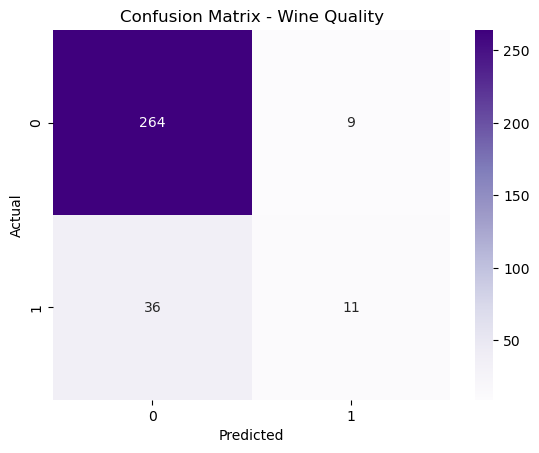

In [7]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples', fmt='d')
plt.title("Confusion Matrix - Wine Quality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
